# <font color=green>Improve the Accuracy of the model by using Hyperparameter tunning.</font>

**Submitted by: <mark>Aakash Mittal</mark>**

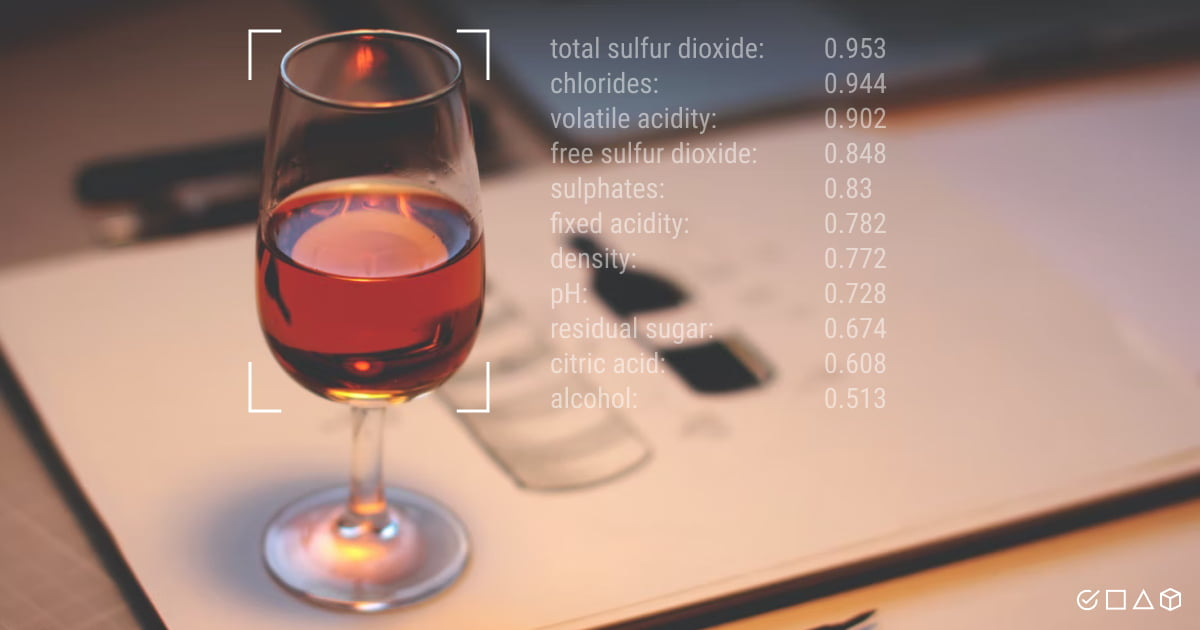

Dataset Link: https://www.youtube.com/watch?v=HdlDYng8g9s&list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&index=17

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Data Ingestion

In [9]:
df = pd.read_csv('wine dataset.csv')

In [10]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# EDA

In [11]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [12]:
df.shape

(6497, 13)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [14]:
df.head(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [15]:
df.quality.unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [16]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

# observation : It is a Multi-Class Classification problem

**As in Target valriable it has many classes**

In [17]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [18]:
df.head(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


# **Finding and replacing null values with median**

In [19]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [20]:
df['fixed acidity'] = df['fixed acidity'].fillna(df['fixed acidity'].median())
df['volatile acidity'] = df['volatile acidity'].fillna(df['volatile acidity'].median())
df['citric acid'] = df['citric acid'].fillna(df['fixed acidity'].median())
df['residual sugar'] = df['residual sugar'].fillna(df['fixed acidity'].median())
df['chlorides'] = df['chlorides'].fillna(df['chlorides'].median())
df['pH'] = df['pH'].fillna(df['pH'].median())
df['sulphates'] = df['sulphates'].fillna(df['sulphates'].median())

In [21]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Pre-Processing

In [22]:
df['type'].unique()

array(['white', 'red'], dtype=object)

In [23]:
df['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

**Applying Label Encoding in type column**

In [24]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['type']= label_encoder.fit_transform(df['type'])
  
df['type'].unique()

array([1, 0])

**Observation:**
- white is refered as '1'
- red is reffered as '0'

# Statistical Analysis

In [25]:
df['type'] = df['type'].astype(int)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int32  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int32(1), int64(1)
memory usage: 634.6 KB


In [27]:
df.describe(include='all')

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.753886,7.216246,0.339630,0.321807,5.444805,0.056039,30.525319,115.744574,0.994697,3.218384,0.531202,10.491801,5.818378
std,0.430779,1.295779,0.164557,0.204201,4.757471,0.035031,17.749400,56.521855,0.002999,0.160637,0.148769,1.192712,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,1.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,1.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,1.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,7.000000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# Split data into Train and Test data

In [28]:
#target Feature
x = df.drop('quality', axis=1)
x.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [29]:
y = df['quality']
y.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

# <font color=#FF0000>**Three Approaches to attain best Accuracy of the Model**</font>

#  <div class="alert alert-danger">Approach 1: Use train_test_split and manually tune parameters by trial and error</div> 

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=12)

In [32]:
x_train, y_train

(      type  fixed acidity  volatile acidity  citric acid  residual sugar  \
 1773     1            7.8              0.39         0.26             9.9   
 591      1            7.3              0.20         0.37             1.2   
 378      1            5.7              0.32         0.50             2.6   
 835      1            7.5              0.42         0.34             4.3   
 2645     1            6.7              0.12         0.30             5.2   
 ...    ...            ...               ...          ...             ...   
 3714     1            8.5              0.18         0.30             1.1   
 3325     1            6.8              0.25         0.28             5.0   
 1414     1            5.8              0.17         0.30             1.4   
 5787     0           10.7              0.90         0.34             6.6   
 5963     0            7.7              0.61         0.18             2.4   
 
       chlorides  free sulfur dioxide  total sulfur dioxide  density    pH

In [33]:
x_test, y_test

(      type  fixed acidity  volatile acidity  citric acid  residual sugar  \
 3607     1            6.8              0.14         0.18             1.4   
 3985     1            6.8              0.11         0.27             8.6   
 3465     1            6.8              0.19         0.34             1.9   
 1749     1            6.1              0.17         0.27             1.5   
 641      1            6.1              0.28         0.25            12.9   
 ...    ...            ...               ...          ...             ...   
 314      1            5.8              0.34         0.21             6.6   
 3840     1            6.7              0.37         0.25             2.5   
 786      1            7.7              0.34         0.28            11.0   
 3534     1            7.2              0.31         0.35             7.2   
 5442     0           14.3              0.31         0.74             1.8   
 
       chlorides  free sulfur dioxide  total sulfur dioxide  density    pH

# Feature Scaling or standardize the dataset

**comes under Pre-Processing**
- **Scaling depends on the data dispersion(using distribution plots, min max value, etc we can detect dispersion)**

In [34]:
#Standardize or Feature Scaling the dataset
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
scaler

StandardScaler()

In [36]:
x_train_tf = scaler.fit_transform(x_train)
x_train_tf

array([[ 0.55894956,  0.45566119,  0.3117139 , ..., -1.10584691,
        -0.75289865,  0.32453747],
       [ 0.55894956,  0.06860621, -0.85663744, ...,  0.63994364,
        -0.27291906,  0.32453747],
       [ 0.55894956, -1.16996973, -0.11873133, ...,  0.01644702,
         0.75560861, -0.42314849],
       ...,
       [ 0.55894956, -1.09255874, -1.04111397, ...,  0.45289465,
        -1.02717269,  0.65684235],
       [-1.78907021,  2.70058008,  3.44781486, ...,  0.01644702,
         1.02988266, -1.00468201],
       [-1.78907021,  0.37825019,  1.66454176, ...,  0.45289465,
         0.48133457, -0.25699605]])

In [37]:
print(scaler.mean_)

[7.61948529e-01 7.21137408e+00 3.39308364e-01 3.21164982e-01
 5.43693704e+00 5.56982996e-02 3.05379136e+01 1.16356503e+02
 9.94650473e-01 3.21736213e+00 5.29802390e-01 1.05093497e+01]


In [38]:
x_test_tf = scaler.transform(x_test)
x_test_tf

# to avoid data leaking we can't use fit_transform instead we use transform

array([[ 5.58949558e-01, -3.18448774e-01, -1.22559049e+00, ...,
         3.28195328e-01,  6.99234962e-02,  5.73766128e-01],
       [ 5.58949558e-01, -3.18448774e-01, -1.41006702e+00, ...,
        -1.08252309e-01, -1.09574120e+00, -5.06224705e-01],
       [ 5.58949558e-01, -3.18448774e-01, -9.18129615e-01, ...,
         2.03496003e-01, -5.47193110e-01,  1.98606183e+00],
       ...,
       [ 5.58949558e-01,  3.78250192e-01,  4.25302042e-03, ...,
         3.28195328e-01, -1.64428930e+00, -1.08775823e+00],
       [ 5.58949558e-01, -8.80478933e-03, -1.80223507e-01, ...,
        -4.82350284e-01,  1.35498438e-03, -6.72377140e-01],
       [-1.78907021e+00,  5.48737595e+00, -1.80223507e-01, ...,
        -2.22814083e+00,  1.78413629e+00, -1.75236797e+00]])

# Model Training

# 1) SVC Model

In [80]:
from sklearn import svm
from sklearn.svm import SVC

In [81]:
Model_1 = SVC()

In [82]:
#object of SVC
Model_1

SVC()

In [83]:
Model_1.fit(x_train_tf,y_train)

SVC()

In [84]:
Model_1.score(x_train_tf, y_train)
#training accuracy

0.6047794117647058

In [85]:
#predicted data
y_pred = Model_1.predict(x_test_tf)
y_pred

array([6, 6, 7, ..., 5, 5, 6], dtype=int64)

In [86]:
#actual value
y_test

3607    6
3985    6
3465    6
1749    6
641     4
       ..
314     5
3840    6
786     6
3534    5
5442    6
Name: quality, Length: 2145, dtype: int64

In [87]:
from sklearn.metrics import accuracy_score 

In [88]:
accuracy1 = accuracy_score(y_test, y_pred)
accuracy1
#test accuracy

0.5673659673659673

**Using Hyperparameter Tunning**

In [103]:
model = svm.SVC(kernel='rbf',C=30,gamma='auto')
model.fit(x_train_tf,y_train)
model.score(x_test_tf, y_test)

0.5799533799533799

**issue with this approach is on changing train and test data score may vary in this approach**

# 2) Logistic Regression Model

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
Model2 = LogisticRegression()
Model2

LogisticRegression()

In [96]:
Model2.fit(x_train_tf, y_train)

LogisticRegression()

In [97]:
Model2.score(x_train_tf, y_train)
#training accuracy

0.5535386029411765

In [98]:
y_pred2 = Model2.predict(x_test_tf)
y_pred2
#predicted value

array([6, 6, 7, ..., 5, 5, 5], dtype=int64)

In [99]:
y_test
#actual value

3607    6
3985    6
3465    6
1749    6
641     4
       ..
314     5
3840    6
786     6
3534    5
5442    6
Name: quality, Length: 2145, dtype: int64

In [100]:
accuracy_2 = accuracy_score(y_test, y_pred2)
accuracy_2
#test accuracy

0.5365967365967366

In [59]:
x_test_tf[1]

array([ 0.55894956, -0.31844877, -1.41006702, -0.25280374,  0.66393812,
       -0.3413394 ,  0.83723093, -0.22074094, -0.03670522, -0.10825231,
       -1.0957412 , -0.5062247 ])

In [60]:
Model2.predict([[ 0.55894956, -0.31844877, -1.41006702, -0.25280374,  0.66393812,
       -0.3413394 ,  0.83723093, -0.22074094, -0.03670522, -0.10825231,
       -1.0957412 , -0.5062247 ]])

array([6], dtype=int64)

In [65]:
#Accuracy before applying Hyperparameter Tunning(Grid Search CV) in Approach 1.
print(f'Accuracy of SVM model is {accuracy1} and Accuracy of Logistic model is {accuracy_2} before applying GridSearchCV')

Accuracy of SVM model is 0.5673659673659673 and Accuracy of Logistic model is 0.5365967365967366 before applying GridSearchCV


# <div class="alert alert-danger">Approach 2: Use K Fold Cross validation</div>

**Manually try suppling models with different parameters to cross_val_score function with 5 fold cross validation**

In [112]:
from sklearn import svm, datasets
wine = datasets.load_wine()

In [114]:
from sklearn.model_selection import cross_val_score
cross_val_score(svm.SVC(kernel='linear',C=10,gamma='auto'),wine.data, wine.target, cv=5)

array([0.88888889, 0.97222222, 0.94444444, 1.        , 1.        ])

In [116]:
cross_val_score(svm.SVC(kernel='rbf',C=10,gamma='auto'),wine.data, wine.target, cv=5)

array([0.44444444, 0.44444444, 0.47222222, 0.42857143, 0.51428571])

In [131]:
#we can also consider score by taking mean of above 5 scores
cross_val_score(svm.SVC(kernel='rbf',C=10,gamma='auto'),wine.data, wine.target, cv=5).mean()

0.46079365079365076

In [130]:
cross_val_score(svm.SVC(kernel='rbf',C=20,gamma='auto'),wine.data, wine.target, cv=5)

array([0.44444444, 0.44444444, 0.47222222, 0.42857143, 0.51428571])

**Above approach is tiresome and very manual. We can use for loop as an alternative**

In [121]:
kernels = ['rbf', 'linear']
C = [1,10,20]
avg_scores = {}
for kval in kernels:
    for cval in C:
        cv_scores = cross_val_score(svm.SVC(kernel=kval,C=cval,gamma='auto'),wine.data, wine.target, cv=5)
        avg_scores[kval + '_' + str(cval)] = np.average(cv_scores)

avg_scores

{'rbf_1': 0.4273015873015873,
 'rbf_10': 0.46079365079365076,
 'rbf_20': 0.46079365079365076,
 'linear_1': 0.961111111111111,
 'linear_10': 0.961111111111111,
 'linear_20': 0.961111111111111}

**From above results we can say that only linear with C = 1 or 10 or 20 will give best performance**

**Observation:**
- By using K fold our Accuracy increases from 56% to 96%

# <div class="alert alert-danger">Approach 3: Use GridSearchCV</div>

**GridSearchCV does exactly same thing as for loop above but in a single line of code**

In [124]:
from sklearn.model_selection import GridSearchCV

In [142]:
classifier = GridSearchCV(svm.SVC(gamma='auto'), {'C': [1,10,20],'kernel': ['rbf','linear']}, cv=5, return_train_score=False)
classifier.fit(wine.data, wine.target)
classifier.cv_results_
#here we try 6 iterations

{'mean_fit_time': array([0.00580587, 0.08323216, 0.00654535, 0.20380397, 0.00751891,
        0.20224133]),
 'std_fit_time': array([0.00309134, 0.00481512, 0.00343774, 0.05165733, 0.00188441,
        0.05256209]),
 'mean_score_time': array([0.00395751, 0.        , 0.00160222, 0.00140691, 0.00090919,
        0.00060515]),
 'std_score_time': array([0.00234359, 0.        , 0.00320444, 0.00186985, 0.00093194,
        0.00121031]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'}],


**The above output is not easy to read so we can convert it into dataframe**

In [128]:
df_out = pd.DataFrame(classifier.cv_results_)
df_out

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003823,0.001152,0.000977,0.000045,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.361111,0.416667,0.444444,0.428571,0.485714,0.427302,0.040501,6
1,0.052446,0.004364,0.000400,0.000490,1,linear,"{'C': 1, 'kernel': 'linear'}",0.888889,0.944444,0.972222,1.000000,1.000000,0.961111,0.041574,1
2,0.002848,0.000427,0.000953,0.000061,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.444444,0.444444,0.472222,0.428571,0.514286,0.460794,0.030215,4
3,0.115646,0.029548,0.000401,0.000491,10,linear,"{'C': 10, 'kernel': 'linear'}",0.888889,0.972222,0.944444,1.000000,1.000000,0.961111,0.041574,1
4,0.003005,0.000019,0.000856,0.000446,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.444444,0.444444,0.472222,0.428571,0.514286,0.460794,0.030215,4
5,0.121910,0.031032,0.000542,0.000455,20,linear,"{'C': 20, 'kernel': 'linear'}",0.888889,0.972222,0.944444,1.000000,1.000000,0.961111,0.041574,1


In [132]:

df_out[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.427302
1,1,linear,0.961111
2,10,rbf,0.460794
3,10,linear,0.961111
4,20,rbf,0.460794
5,20,linear,0.961111


In [134]:
dir(classifier) 
#properties of objects

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'inverse_transform',
 'multimetric_',
 'n_features_in_',
 'n_jobs

In [136]:
classifier.best_params_

{'C': 1, 'kernel': 'linear'}

In [138]:
classifier.best_score_

0.961111111111111

**Observation:**
- by using GridSearchCV we can attain 96% of accuracy

# Random Search CV 

1 drawback using GridSearchCV is computational cost if we have large amount of data points then we have very high computational cost. Right now we have limited value of 'C' what if we have range of C b/w [1-50] then computation cost is very high bcoz now it will try Permutation and combination for every value in each of the parameter. To tackle this we have Randomized Search CV


**Random Search CV will not try Permutation and combination for each parameter but it will try random combination of parameter value**

**Use RandomizedSearchCV to reduce number of iterations and with random combination of parameters. This is useful when you have too many parameters to try and your training time is longer. It helps reduce the cost of computation**

In [143]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(svm.SVC(gamma='auto'), {
        'C': [1,10,20],
        'kernel': ['rbf','linear']
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=2     #here we try only 2 iterations
)
rs.fit(wine.data, wine.target)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]


,param_C,param_kernel,mean_test_score
0,20,linear,0.961111
1,1,linear,0.961111
